# Jupyter Notebook (Python) script for recreating Fig.01

- date: 2024-06-05
- author: Tim Vogel
- group: Photonics and Ultrafast Laser Science (PULS), Ruhr-University Bochum, Germany

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np
import pandas as pd

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 8
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
odata = pd.read_csv("Fig.01_literature_lithium_niobate_sources.csv", index_col=0)
odata

method       type            geometry         material  \
0   optical rectification  inorganic  tilted pulse front  lithium niobate   
1   optical rectification  inorganic  tilted pulse front  lithium niobate   
2   optical rectification  inorganic  tilted pulse front  lithium niobate   
3   optical rectification  inorganic  tilted pulse front  lithium niobate   
4   optical rectification  inorganic  tilted pulse front  lithium niobate   
5   optical rectification  inorganic  tilted pulse front  lithium niobate   
6   optical rectification  inorganic  tilted pulse front  lithium niobate   
7   optical rectification  inorganic  tilted pulse front  lithium niobate   
8   optical rectification  inorganic  tilted pulse front  lithium niobate   
9   optical rectification  inorganic  tilted pulse front  lithium niobate   
10  optical rectification  inorganic  tilted pulse front  lithium niobate   
11  optical rectification  inorganic  tilted pulse front  lithium niobate   
12  optical rectification  inorganic  tilted pulse front  lithium niobate   
13  optical rectification  inorganic  tilted pulse front  lithium niobate   
14  optical rectification  inorganic  tilted pulse front  lithium niobate   
15  optical rectification  inorganic  tilted pulse front  lithium niobate   
16  optical rectification  inorganic  tilted pulse front  lithium niobate   
17  optical rectification  inorganic  tilted pulse front  lithium niobate   
18  optical rectification  inorganic  tilted pulse front  lithium niobate   
19  optical rectification  inorganic  tilted pulse front  lithium niobate   
20  optical rectification  inorganic  tilted pulse front  lithium niobate   
21  optical rectification  inorganic  tilted pulse front  lithium niobate   
22  optical rectification  inorganic  tilted pulse front  lithium niobate   
23  optical rectification  inorganic  tilted pulse front  lithium niobate   
24  optical rectification  inorganic  tilted pulse front  lithium niobate   
25  optical rectification  inorganic  tilted pulse front  lithium niobate   
26  optical rectification  inorganic  tilted pulse front  lithium niobate   

   emitter_compact    sub_material                                      extra  \
0        Inorganic             NaN                                Ti:Sapphire   
1        Inorganic  stoichiometric                  Yb bulk solid state laser   
2        Inorganic             NaN                                Ti:Sapphire   
3        Inorganic             NaN                             Yb-doped fiber   
4        Inorganic             NaN                                Ti:Sapphire   
5        Inorganic             NaN                                 Yb:YAG CPA   
6        Inorganic             NaN                                Yb:YAG, CPA   
7        Inorganic       congruent    Yb-doped fiber laser, Regen. Compressor   
8        Inorganic  stoichiometric              Yb:CaF2 laser; Chirped Pulses   
9        Inorganic             NaN                                Yb:YAG, CPA   
10       Inorganic  stoichiometric                       Yb-doped fiber laser   
11       Inorganic             NaN                 Chirped Ti:Sapphire Pulses   
12       Inorganic             NaN                                Yb:YAG, CPA   
13       Inorganic  stoichiometric                          Yb:YAG oscillator   
14       Inorganic  stoichiometric                           Yb:YAG thin-disk   
15       Inorganic             NaN               Telescope Ti:Sapphire Pulses   
16       Inorganic             NaN                           Ti:Sapphire Amp.   
17       Inorganic             NaN                 Chirped Ti:Sapphire Pulses   
18       Inorganic             NaN                          Yb:LuAg TDO + MPC   
19       Inorganic  stoichiometric                     Yb:YAG amplifier + MPC   
20       Inorganic             NaN                        Chirped Ti:Sapphire   
21       Inorganic             NaN                        Chirped Ti:Sapphire   

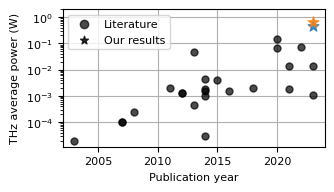

In [6]:
WIDTH_SIZE = 8.6/2.54
HEIGHT_SIZE = 5/2.54
fig, ax = plt.subplots(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
ax.set_yscale('log')
ax.set_xlabel('Publication year')
ax.set_ylabel('THz average power (W)')
for idx in odata.index:
    if odata.loc[idx, "our_result"] == "yes":
        if odata.loc[idx, "repetition_rate"] > 1e6:
            ax.scatter(odata.loc[idx, "year"], odata.loc[idx, "thz_average_power"], marker="o", s=5**2, alpha=0.7, color="black")
        elif odata.loc[idx, "thz_average_power"] < 500e-3:
            ax.scatter(odata.loc[idx, "year"], odata.loc[idx, "thz_average_power"], marker="*", s=8**2, alpha=0.8, color="tab:blue")
        elif odata.loc[idx, "thz_average_power"] > 500e-3:
            ax.scatter(odata.loc[idx, "year"], odata.loc[idx, "thz_average_power"], marker="*", s=8**2, alpha=0.8, color="tab:orange")
    else:
        ax.scatter(odata.loc[idx, "year"], odata.loc[idx, "thz_average_power"], marker="o", s=5**2, alpha=0.7, color="black")
ax.legend(["Literature", "Our result"])
line1 = ax.scatter([], [], marker="o",  label="Literature", color="black", alpha=0.7)
line2 = ax.scatter([], [], marker="*",  label="Our results", color="black", alpha=0.8)
ax.legend(handles=[line1, line2], loc="upper left")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylim(top=2)
fig.tight_layout()
plt.savefig("Fig.01_THzPowerYear.png", dpi=600, facecolor="white")